# Hochschule Bonn-Rhein-Sieg
### Scientific Experimentation and Evaluation, SS18
### Assignment 2

submitted by: `Abhishek Padalkar, Max Mensing, Pranjal Dhole`

In [1]:
import numpy as np
import pandas
import sys, os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

sys.path.append(os.getcwd())
%matplotlib inline

In [2]:
data = pandas.read_csv('data/motionData.csv', header=[0,1,2])
display(data.head(10))

,Straight Motion,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0,Right turn Motion,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Left turn Motion,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0
,Right wheel,Unnamed: 1_level_1,Left Wheel,Unnamed: 3_level_1,Right wheel,Unnamed: 5_level_1,Left Wheel,Unnamed: 7_level_1,Right wheel,Unnamed: 9_level_1,Left Wheel,Unnamed: 11_level_1
,x(cm),y(cm),x(cm),y(cm),x(cm),y(cm),x(cm),y(cm),x(cm),y(cm),x(cm),y(cm)
0,40.3,20.3,40.2,34.9,10.9,1.5,25.1,4.2,25.0,51.5,10.8,54.3
1,40.3,20.3,40.3,34.8,10.3,1.2,24.5,3.5,25.0,51.3,11.2,54.1
2,40.2,20.9,40.0,35.3,10.4,1.3,24.6,4.0,25.1,51.4,10.9,54.0
3,40.2,20.5,40.0,35.0,10.9,1.6,25.1,4.3,25.0,51.6,10.5,54.9
4,40.5,20.1,40.4,34.6,10.4,1.4,24.2,4.0,25.1,51.4,10.9,54.0
5,40.5,20.0,40.4,34.5,10.0,0.9,24.4,3.2,25.2,51.1,10.5,54.9
6,40.6,20.3,40.8,34.8,11.0,1.6,25.2,4.8,24.8,51.9,10.5,54.6
7,40.4,19.9,40.6,34.3,11.2,2.0,24.5,4.9,24.0,52.2,9.9,54.7


In [3]:
database = data.as_matrix()
data_array = database.copy()
straight_motion_data = data_array[:,0:4]
right_turn_data = data_array[:,4:8]
left_turn_data = data_array[:,8:12]

In [4]:
# Final position of robot LED centers
wheel_Rx_s = straight_motion_data[:,0]
wheel_Ry_s = straight_motion_data[:,1]
wheel_Lx_s = straight_motion_data[:,2]
wheel_Ly_s = straight_motion_data[:,3]

wheel_Rx_r = right_turn_data[:,0]
wheel_Ry_r = right_turn_data[:,1]
wheel_Lx_r = right_turn_data[:,2]
wheel_Ly_r = right_turn_data[:,3]

wheel_Rx_l = left_turn_data[:,0]
wheel_Ry_l = left_turn_data[:,1]
wheel_Lx_l = left_turn_data[:,2]
wheel_Ly_l = left_turn_data[:,3]

In [5]:
# Starting position of robot LED centers
wheel_Rx0_s = 0.0
wheel_Ry0_s = 20.6
wheel_Lx0_s = 0.0
wheel_Ly0_s = 35.1

wheel_Rx0_r = 0.0
wheel_Ry0_r = 20.6
wheel_Lx0_r = 0.0
wheel_Ly0_r = 35.1

wheel_Rx0_l = 0.0
wheel_Ry0_l = 20.6
wheel_Lx0_l = 0.0
wheel_Ly0_l = 35.1

In [6]:
display('Left turn motion:')
print('standard deviation in right wheel (x, y):', np.std(wheel_Rx_l), np.std(wheel_Ry_l))
print('standard deviation in left wheel (x, y):', np.std(wheel_Lx_l), np.std(wheel_Ly_l))

display('Right turn motion:')
print('standard deviation in right wheel (x, y):', np.std(wheel_Rx_r), np.std(wheel_Ry_r))
print('standard deviation in left wheel (x, y):', np.std(wheel_Lx_r), np.std(wheel_Ly_r))

display('Straight motion:')
print('standard deviation in right wheel (x, y):', np.std(wheel_Rx_s), np.std(wheel_Ry_s))
print('standard deviation in left wheel (x, y):', np.std(wheel_Lx_s), np.std(wheel_Ly_s))

'Left turn motion:'

standard deviation in right wheel (x, y): 0.30495901363953826 0.3259984662540611
standard deviation in left wheel (x, y): 0.3290516676754579 0.32752862470324623


'Right turn motion:'

standard deviation in right wheel (x, y): 0.34770677301427416 0.24794152536434874
standard deviation in left wheel (x, y): 0.37403208418530054 0.5018714974971183


'Straight motion:'

standard deviation in right wheel (x, y): 0.19131126469709028 0.45439520243946224
standard deviation in left wheel (x, y): 0.2792848008753783 0.4958578425315071


In [7]:
# Distance travelled by robot wheels
s_rx_distance = np.absolute(wheel_Rx_s - wheel_Rx0_s)
s_ry_distance = np.absolute(wheel_Ry_s - wheel_Ry0_s)
s_lx_distance = np.absolute(wheel_Lx_s - wheel_Lx0_s)
s_ly_distance = np.absolute(wheel_Ly_s - wheel_Ly0_s)

r_rx_distance = np.absolute(wheel_Rx_r - wheel_Rx0_r)
r_ry_distance = np.absolute(wheel_Ry_r - wheel_Ry0_r)
r_lx_distance = np.absolute(wheel_Lx_r - wheel_Lx0_r)
r_ly_distance = np.absolute(wheel_Ly_r - wheel_Ly0_r)

l_rx_distance = np.absolute(wheel_Rx_l - wheel_Rx0_l)
l_ry_distance = np.absolute(wheel_Ry_l - wheel_Ry0_l)
l_lx_distance = np.absolute(wheel_Lx_l - wheel_Lx0_l)
l_ly_distance = np.absolute(wheel_Ly_l - wheel_Ly0_l)

In [8]:
# Mean of distance travelled by wheels
s_rx_distance_mean = s_rx_distance.mean()
s_ry_distance_mean = s_ry_distance.mean()
s_lx_distance_mean = s_lx_distance.mean()
s_ly_distance_mean = s_ly_distance.mean()

r_rx_distance_mean = r_rx_distance.mean()
r_ry_distance_mean = r_ry_distance.mean()
r_lx_distance_mean = r_lx_distance.mean()
r_ly_distance_mean = r_ly_distance.mean()

l_rx_distance_mean = l_rx_distance.mean()
l_ry_distance_mean = l_ry_distance.mean()
l_lx_distance_mean = l_lx_distance.mean()
l_ly_distance_mean = l_ly_distance.mean()

In [13]:
def plot_data(rx, ry, lx, ly, rx0, ry0, lx0, ly0, whichData, save_fig=True):
    rx_mean = rx.mean()
    ry_mean = ry.mean()
    lx_mean = lx.mean()
    ly_mean = ly.mean()

    # fig, ax = plt.subplots()
    fig = plt.figure(figsize=(10, 10))
    ax = plt.gca()
    Rwheel = ax.scatter(rx, ry, c='g', label=('right wheel'.format(whichData)))
    Lwheel = ax.scatter(lx, ly, c='b', label=('left wheel'.format(whichData)))
    Rwheel_mean = ax.scatter(rx_mean, ry_mean, c='r', marker='x',\
                                      label=('right wheel mean value'.format(whichData)))
    Lwheel_mean = ax.scatter(lx_mean, ly_mean, c='r', marker='x',\
                                      label=('left wheel mean value'.format(whichData)))
    Rwheel_init = ax.scatter(rx0, ry0, c='g', marker='+',
                             label=('right wheel initial'.format(whichData)))
    Lwheel_init = ax.scatter(lx0, ly0, c='b', marker='+',\
                             label=('left wheel initial'.format(whichData)))

    # Setup of zoom-in figure and legend position
    if whichData == 'Straight':
        ax.legend(loc=1)
        axin_r = zoomed_inset_axes(ax, 8, loc=8)
        mark_inset(ax, axin_r, loc1=4, loc2=2, fc="none", ec="0.5")
        axin_l = zoomed_inset_axes(ax, 8, loc=9)
        mark_inset(ax, axin_l, loc1=1, loc2=3, fc="none", ec="0.5")
    elif whichData == 'Right-turn':
        ax.legend(loc=2)
        axin_r = zoomed_inset_axes(ax, 8, loc=1)
        mark_inset(ax, axin_r, loc1=4, loc2=2, fc="none", ec="0.5")
        axin_l = zoomed_inset_axes(ax, 8, loc=4)
        mark_inset(ax, axin_l, loc1=2, loc2=3, fc="none", ec="0.5")
    elif whichData == 'Left-turn':
        ax.legend(loc=3)
        axin_r = zoomed_inset_axes(ax, 8, loc=1)
        mark_inset(ax, axin_r, loc1=2, loc2=3, fc="none", ec="0.5")
        axin_l = zoomed_inset_axes(ax, 8, loc=4)
        mark_inset(ax, axin_l, loc1=1, loc2=3, fc="none", ec="0.5")
    
    # Plot into zoom-in figures
    axin_r.scatter(rx, ry, c='g', label=('right wheel'.format(whichData)))
    axin_r.scatter(rx_mean, ry_mean, c='r', marker='x',
                   label=('right wheel mean value'.format(whichData)))
    axin_r.set_xlim(rx_mean-1.5, rx_mean+1.5)
    axin_r.set_ylim(ry_mean-1.5, ry_mean+1.5)

    axin_l.scatter(lx, ly, c='b', label=('left wheel'.format(whichData)))
    axin_l.scatter(lx_mean, ly_mean, c='r', marker='x',
                   label=('left wheel mean value'.format(whichData)))
    axin_l.set_xlim(lx_mean-1.5, lx_mean+1.5)
    axin_l.set_ylim(ly_mean-1.5, ly_mean+1.5)
    
    # Labels
    title = whichData+' motion of Lego robot'
    ax.set_title(title)
    ax.set_xlabel('distance (cm)')
    ax.set_ylabel('distance (cm)')
    
    # Figure aspects 
    ax.set_aspect('equal')
    ax.set_xlim(-10, 60)
    ax.set_ylim(-10, 60)
    ax.grid(color='b', linestyle='-', linewidth=.1)
    
    if save_fig:
        fig.savefig('images/'+whichData)

    plt.show()
    plt.close()

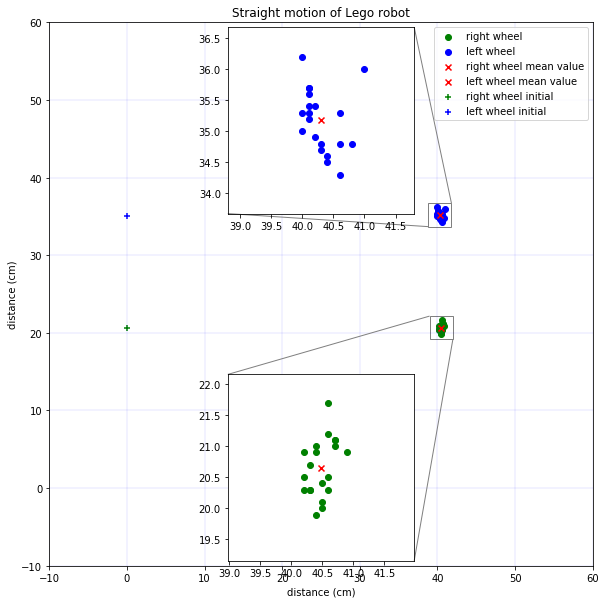

In [14]:
plot_data(wheel_Rx_s, wheel_Ry_s, wheel_Lx_s, wheel_Ly_s,
          wheel_Rx0_s, wheel_Ry0_s, wheel_Lx0_s, wheel_Ly0_s,
          whichData='Straight')

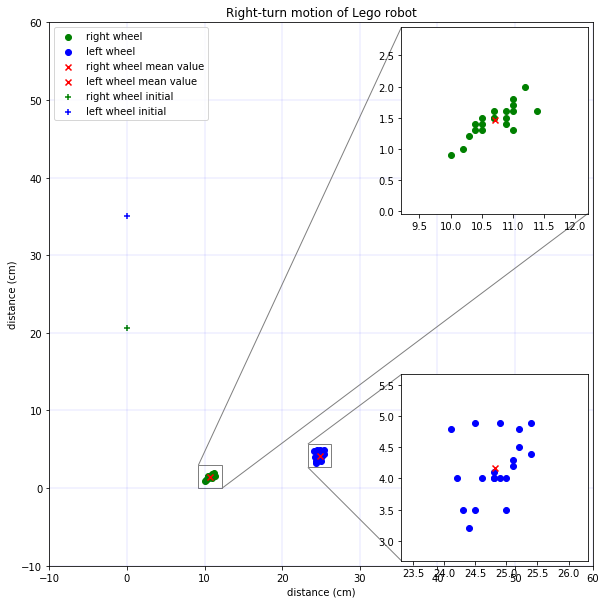

In [11]:
plot_data(wheel_Rx_r, wheel_Ry_r, wheel_Lx_r, wheel_Ly_r,
          wheel_Rx0_r, wheel_Ry0_r, wheel_Lx0_r, wheel_Ly0_r,
          whichData='Right-turn')

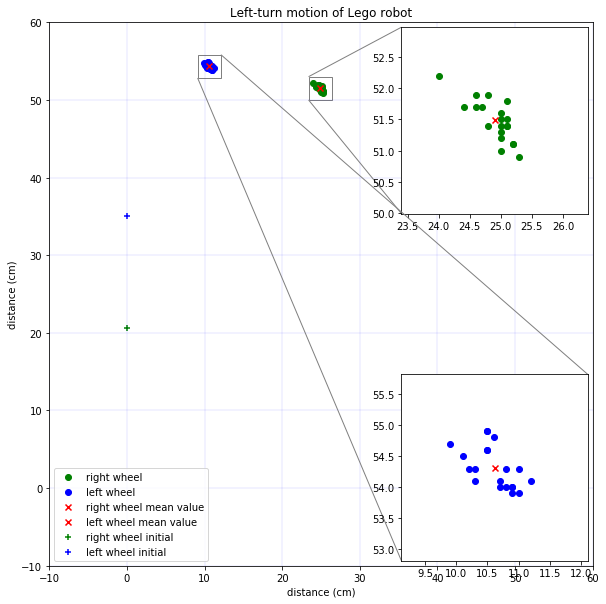

In [12]:
plot_data(wheel_Rx_l, wheel_Ry_l, wheel_Lx_l, wheel_Ly_l,
          wheel_Rx0_l, wheel_Ry0_l, wheel_Lx0_l, wheel_Ly0_l,
          whichData='Left-turn')